# HUD Capstone Project

### Project: HUB

* TestFit (name of the company)
	* what is the relationship to Alec (Clifton Harness (CEO))
	* Software company for architecture, engineering and construction
	* Generative design software: Making models of stuff for later physical assembly. 
	* How does the system operate? One time purchase? Subscription
* Research Question
    * How many apartments units are being built in the US everyday
        * Why?
        * So that Clifton can target the most valuable markets at the appropriate time
        * Distillate:
        * How many high-density, multifamily (MF) structures are being built in the US everyday. 
* Data
    * U.S Department of Housing and Urban Development, Federal Housing Administration (2006 - 2020)
* Deliverables
    * Deliver actionable insights on the drivers and patterns leading to an increase of high-density in the form of a Jupiter notebook
    * Develop a Time Series Regression + Classification model that predicts which markets are worth targeting and when. 
        * Historical examples to be used in establishment of threshold
            * Houston in 2009
            * Seattle in 2010
            * Dallas in 2012
        * Findings and model to present to potential employers
* Questions:
    * How much can we present about TestFit? Permission for public publication
    * How does the regression / classification apply
    * How granular are we talking, in terms of markets
    * Can we talk to Clifton? Questions about his market and business model
* Biggest concern at the moment:
    * What is our question - how is the data going to help us answer it? How is the question going to help our stakeholder?
    * What does the MVP look like? What are additional features that can lend to more features. 
* Questions for the team:
    * What areas do you enjoy / do best?
    * What tasks do you not like / feel you can’t do?
    * How do you like to work? Prefer quiet time? Prefer collaborative? 

### MVP:
* Time Series / Regression + Classification Model
    * Input: 
    * Output: Prediction of which markets, and at what time period, for business development
* Where is he going to deploy labor / marketing resources?
* Can we narrow it to the top 100 cities in the states?
* Focus on market value


--------


Recommendation of what cities to deploy to (based on "total morgage given"). We will focus on top 25 cities in the US.

### Notes from the data:
* Looking at commitment that has been approved (why commitment’s vs endorsements)
* 

### Timeline:

* Thursday, July 9: Data Scientist Day (Remote)
* Tuesday, July 7: Recordings Completed (in order to have time for video editing)
* Monday, July 6: Recordings
* Thursday, July 2: Review Panel 3 (with staff)
* Wednesday, July 1: Review Panel 2 (with another active cohort)
* Tuesday, June 30: Review Panel 1 (with staff)
* June 29: Polish presentation, code freeze (except if changing visualization titles, axes, etc.)
* June 26: complete project including presentation
* June 24: Not starting anything new, only finishing existing stuff
* MVP: EOD Tuesday
* Friday: acquire
* Wednesday, Thursday: plan

# Acquire

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

In [2]:
# commitments
df  = pd.read_excel("Initi_Endores_Firm Comm_DB_FY06_FY20_Q2.xlsx", sheet_name="Firm Cmtmts, Iss'd and Reiss'd", header=6)
print(df.shape)

(20918, 29)


In [3]:
df.to_csv("hud_commitments.csv")

In [4]:
df.rename(columns={"Activity Group": "activity_group"}, inplace=True)

In [5]:
df.head()

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,activity_group,Facility Type,Program Designation,...,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,...,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,...,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,...,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,TAP,0,0,0,0,0,0,0,Firm Expired,5247700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20918 entries, 0 to 20917
Data columns (total 29 columns):
FHA Number                                                               20918 non-null int64
Project Name                                                             20918 non-null object
Project City                                                             20918 non-null object
Project State                                                            20918 non-null object
Basic FHA, Risk Share or Other                                           20918 non-null object
Program Category                                                         20918 non-null object
Activity Description                                                     20918 non-null object
activity_group                                                           20918 non-null object
Facility Type                                                            20918 non-null object
Program Designation                  

In [7]:
# States based on the city counts

df.groupby("Project State")["Project City"].count().nlargest(10)

Project State
TX    1746
CA    1315
OH    1266
IL    1125
IN     993
MI     897
FL     890
MA     869
NC     771
NY     771
Name: Project City, dtype: int64

In [8]:
df.groupby("Project State")["Mortgage at Firm Commitment Issuance"].sum().nlargest(10)

Project State
TX    22295900613
NY    16332545528
CA    15524648763
FL    11823762796
MA    11687665817
IL    11315865347
MD     9704006855
VA     8658373269
OH     7990538151
NC     7910398709
Name: Mortgage at Firm Commitment Issuance, dtype: int64

In [9]:
df.nlargest(1, columns="Mortgage at Firm Commitment Issuance")["Project City"]

2929    Trenton
Name: Project City, dtype: object

In [10]:
print(
    
f'''
      
Morgages Max:
The year is {df.nlargest(1, columns="Mortgage at Firm Commitment Issuance")["Fiscal Year of Firm Commitment"].values}      
The max is ${df["Mortgage at Firm Commitment Issuance"].max():,}
The city: {df.nlargest(1, columns="Mortgage at Firm Commitment Issuance")["Project City"].values}, {df.nlargest(1, columns="Mortgage at Firm Commitment Issuance")["Project State"].values}

Morgages Min:
The year is {df.nsmallest(1, columns="Mortgage at Firm Commitment Issuance")["Fiscal Year of Firm Commitment"].values}      
The max is ${df["Mortgage at Firm Commitment Issuance"].min():,}
The city: {df.nsmallest(1, columns="Mortgage at Firm Commitment Issuance")["Project City"].values}, {df.nsmallest(1, columns="Mortgage at Firm Commitment Issuance")["Project State"].values}


    
    
''')


      
Morgages Max:
The year is [2009]      
The max is $777,641,700
The city: ['Trenton'], ['NJ']

Morgages Min:
The year is [2010]      
The max is $1
The city: ['roxbury'], ['MA']


    
    



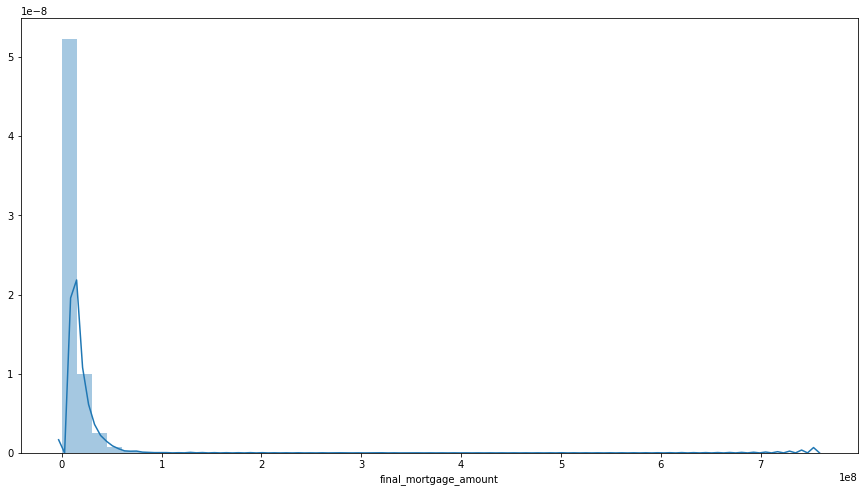

In [141]:
plt.figure(figsize=(15, 8))
sns.distplot(df["final_mortgage_amount"])

In [11]:
# How many mortgages are below $1,000?

df[df['Mortgage at Firm Commitment Issuance'] < 10000]

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,activity_group,Facility Type,Program Designation,...,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
4296,2398188,Franklin Park Apartments,roxbury,MA,Risk Sharing,HFA Risk Sharing,SubRehab,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,...,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,1


In [12]:
df["Mortgage at Firm Commitment Issuance"].nsmallest(2)

4296        1
1580    70100
Name: Mortgage at Firm Commitment Issuance, dtype: int64

The instance above is clearly an anomaly, and I recommend it is removed. It seems really strange that there would be a morgage approved for the total value of $1, especially because the next closest minimal loan approved is for 70,000. 

In [138]:
# what are the other projects in roxbury?

df[df["activity_description"] == "SubRehab"]["final_mortgage_amount"].median()

6700000.0

In [24]:
# What is the mean?

print(f'The mean mortgage is: ${round(df["Mortgage at Firm Commitment Issuance"].mean()):,}')

The mean mortgage is: $10,688,043


In [33]:
# What is the upper limit looking at?

df[df["Mortgage at Firm Commitment Issuance"] > df["Mortgage at Firm Commitment Issuance"].mean()].groupby("Project State")["Mortgage at Firm Commitment Issuance"].count().sort_values(ascending=False)

Project State
TX    816
CA    434
FL    416
MA    384
NY    380
IL    367
VA    290
MD    284
NC    252
OH    216
MN    201
IN    196
MI    193
CO    187
TN    163
NJ    162
GA    156
WA    133
LA    130
AZ    124
MO    107
PA    105
UT     99
AL     98
SC     91
OR     79
WI     75
NV     70
CT     66
DC     59
OK     51
MS     46
RI     38
NE     33
NH     33
AR     32
KY     32
KS     26
NM     26
WV     23
IA     22
ID     21
DE     19
MT     17
HI     14
WY     10
ME      8
SD      7
ND      6
VT      4
PR      1
VI      1
AK      1
Name: Mortgage at Firm Commitment Issuance, dtype: int64

In [84]:

df = wrangle.wrangle_hud()

In [99]:
cities = df["project_city"].value_counts()

In [102]:
cities[cities.index.str.isdigit()]

55435    1
Name: project_city, dtype: int64

In [109]:
# There is a city that is only numbers... this might be a typo?

df[df["project_city"] == "55435"]

,fha_number,project_name,project_city,project_state,"basic_fha,_risk_share_or_other",program_category,activity_description,activity_group,facility_type,program_designation,...,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
18098,9235817,Aria,55435,MN,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,...,MAP,False,False,False,False,False,False,False,Finally Endorsed,45885700


In [133]:
# Are there other project names that we could use to accurately label this data point?

df[df["project_name"] == "Aria"]

,fha_number,project_name,project_city,project_state,"basic_fha,_risk_share_or_other",program_category,activity_description,activity_group,facility_type,program_designation,...,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
18098,9235817,Aria,55435,MN,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,...,MAP,False,False,False,False,False,False,False,Finally Endorsed,45885700


In [132]:
# Is there a similarity on the other cities that we could say this is group with them?

df[df["project_state"] == "MN"].groupby("project_city")["project_name", "final_mortgage_amount"].mean().sort_values(by="final_mortgage_amount")

,final_mortgage_amount
project_city,
Mora,623000.0
Twin Valley,636900.0
Perham,650000.0
Mound,721000.0
Browns Valley,754500.0
...,...
Chanhassen,24780400.0
Virginia,26618800.0
55435,45885700.0


After some research - it is most likely that this is actually a zipcode. 

Based on this assumption: **Postal code in the Hennepin County, Minnesota**

## Things to discuss with everyone:

1. Added new list to Trello. This is a bit different, but the idea is that we add new cards as we open different Git Documents. This is to reduce the risk of a merge conflict.
1. Divide exploration:
    * Is there a difference in mortgages by year by type for whole data set?
    * Is there a significant difference, by city, in the number of loans given per year?
    * Is there a significant difference, by city, in the dollar amount of loans approved, by year?
    * What are the characteristics of loan practices in Houston (2009), Seattle (2010),  and Dallas (2012)?
    * Are there any trends or seasonality over time that we see in terms of number of loans approved / quantity?
    * Show the yearly mortgages by type for whole data set?
    